# Single Variable Polynomial Regression

In [1]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


## Install Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset

In [3]:
df = pd.read_csv('../SingleVariablePolynomialRegression/data/Data.csv')

In [4]:
df.head()

,X,Y
0,0.987988,5.098368
1,0.719720,2.516654
2,-0.403403,0.337961
3,0.107107,0.737320
4,0.345345,-0.780955


### Note: No NAN Values

In [5]:
df.isna().sum()

X    0
Y    0
dtype: int64

## Normalize the feature X

In [6]:
df['X'] = (df['X']-np.mean(df['X']))/np.std(df['X'])

In [7]:
df.head()

,X,Y
0,1.709535,5.098368
1,1.245345,2.516654
2,-0.698017,0.337961
3,0.185330,0.737320
4,0.597558,-0.780955


## Generate Random Test and Train Splits

In [8]:
seed = 420
train_fraction = 0.8
train = df.sample(frac=train_fraction, random_state=seed)
test = df.drop(train.index)

In [9]:
train.info

<bound method DataFrame.info of             X         Y
715 -1.259202  0.035008
353  1.591755  2.834778
507  0.105655 -1.238693
713  0.943968  0.730347
553 -0.500563  0.381970
..        ...       ...
252 -1.435871  0.610148
327  0.012124  0.765786
115 -0.396640 -0.704895
174 -0.025981  2.100271
701 -1.629861 -0.873611

[800 rows x 2 columns]>

In [10]:
test.info

<bound method DataFrame.info of             X         Y
3    0.185330  0.737320
8   -0.670304 -0.566798
9    0.715337  2.219073
10  -0.012124  0.341446
28   0.902399  1.116080
..        ...       ...
975  1.674894  5.692382
983  0.348142 -0.517849
994  0.912791  1.611825
995  1.162207  3.079356
996 -1.065212  0.027487

[200 rows x 2 columns]>

## Polynomial Regression Model

In [107]:
class PolynomialRegressionModel:
    def __init__(self, degree):
        """
        Polynomial Regression Model for some particular degree.
        """
        self.errors = {}
        self.deg = degree
        self.weights = np.random.rand(1, degree+1)

    def calculate_loss(self, input, target):
        # print('inside self.calculate_loss()')
        assert type(input) == float and type(target) == float, "Types are not matching. Check!"
        result = []
        prediction = self.predict([input])
        # print('predicted:')
        # print(prediction)
        # print('expected')
        # print(target)
        for i in range(self.deg+1):
            result.append(
                (input**i)*(prediction-target)
            )
        # print('loss: ')
        # print(result)
        return np.array(result).reshape(self.weights.shape)

    def fit(self, X_train, y_train, lr=0.01, epochs=500, batch_size=20):
        """
        Fit the polynomial regression model using Batch Gradient Descent.

        Parameters:
        X_train: Input Feature variable (only one!)
        y_train: Target Variable
        lr: Learning Rate for Gradient Descent
        epochs: No of Epochs to train

        Returns:
        NA
        """
        print('Starting Training.....')
        for epoch in range(epochs):
            count = 0
            loss = np.zeros_like(self.weights)
            for sample in zip(X_train, y_train):
                input = sample[0]
                target = sample[1]
                # print(input, target)
                if count%batch_size == 0:
                    loss /= batch_size
                    self.weights *= 0.995
                    self.weights -= lr*loss
                    loss = np.zeros_like(self.weights)
                else:
                    loss += self.calculate_loss(input, target)
            
                count+=1
                if (epoch*X_train.shape[0]+count) % (X_train.shape[0]/2) == 0:
                    # print(epoch*X_train.shape[0]+count)
                    self.errors[epoch*X_train.shape[0]+count] = self.calculate_error(X_train, y_train)
            if epoch%(epochs/10) == 0:
                print(f"epoch: {epoch}")
                print(f"Error: {self.calculate_error(X_train, y_train)}")

        return

    def calculate_error(self, X_test, y_test):
        """
        Find the error of the model on some data.

        Parameters:
        X_test: The sample Input Feature.
        y_test: The sample Target Feature.

        Returns:
        A float value that is the MSE b/w the predicted outputs and the target outputs.
        """
        predictions = self.predict(X_test)
        mse = np.mean(
            (predictions-y_test)**2
        )
        return mse

    def predict(self, X_test):
        """
        Make Predictions using the trained model.

        Parameters:
        X_test: The sample Input Features.

        Returns:
        A numpy Array with the predicted target variable value for each of the samples having
        same dimensions as X_test.
        """
        result = [] 
        for sample in X_test:
            assert type(sample) == float, "Variable doesn't have the required type!"
            arr = np.array([sample**i for i in range(self.deg+1)]).reshape(1, self.deg+1)
            result.append(arr.dot(self.weights.T)[0][0])
            
        return np.array(result)

## Skip

In [108]:
model = PolynomialRegressionModel(3)
model.fit(train['X'], train['Y'], lr=0.001, epochs=200)

Starting Training.....
400
800
epoch: 0
Error: 1.4636415429084195
1200
1600
2000
2400
2800
3200
3600
4000
4400
4800
5200
5600
6000
6400
6800
7200
7600
8000
8400
8800
9200
9600
10000
10400
10800
11200
11600
12000
12400
12800
13200
13600
14000
14400
14800
15200
15600
16000
16400
16800
epoch: 20
Error: 2.1459037066369633
17200
17600
18000
18400
18800
19200
19600
20000
20400
20800
21200
21600
22000
22400
22800
23200
23600
24000
24400
24800
25200
25600
26000
26400
26800
27200
27600
28000
28400
28800
29200
29600
30000
30400
30800
31200
31600
32000
32400
32800
epoch: 40
Error: 2.1479151159505756
33200
33600
34000
34400
34800
35200
35600
36000
36400
36800
37200
37600
38000
38400
38800
39200
39600
40000
40400
40800
41200
41600
42000
42400
42800
43200
43600
44000
44400
44800
45200
45600
46000
46400
46800
47200
47600
48000
48400
48800
epoch: 60
Error: 2.1479348242401177
49200
49600
50000
50400
50800
51200
51600
52000
52400
52800
53200
53600
54000
54400
54800
55200
55600
56000
56400
56800
57200
57

In [81]:
x = model.loss.keys()
x
y = []
for i in x:
    y.append(model.loss[i])
x = np.array(list(x))
y = np.array(y)


In [82]:
y

array([1.16242798, 2.1479351 , 2.1479351 , 2.1479351 , 2.1479351 ,
       2.1479351 , 2.1479351 , 2.1479351 , 2.1479351 , 2.1479351 ])

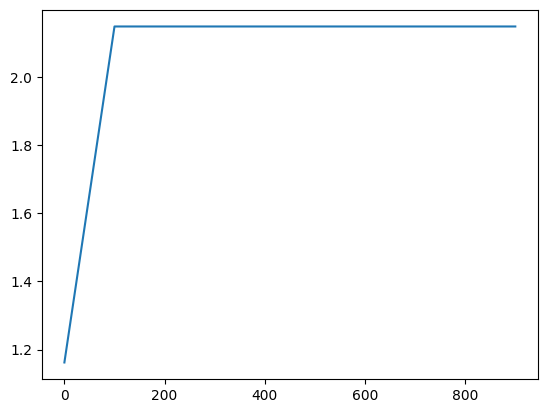

In [84]:
plt.plot(x, y)
plt.show()

In [44]:
y_pred = model.predict(test['X'])
y_pred

array([ 1.57858353e-01,  1.24651345e-02,  3.89659977e-01,  1.26228194e-01,
        5.57618059e-01, -1.28682605e-03, -5.12828638e-02,  1.05588278e+00,
        2.08396183e+00,  2.70505652e-02, -1.82663558e-01,  4.88660918e-01,
       -7.88466963e-02,  8.10318405e-02,  1.26666046e-01,  1.49259276e+00,
        6.77645624e-02,  1.32911371e+00,  6.73112787e-01, -1.51654978e-01,
        9.48276074e-01,  1.94127824e-02,  1.42583853e-01, -9.74322685e-01,
        8.82122618e-02,  1.96185473e+00,  1.04347203e+00,  9.50794259e-02,
        1.14460753e-01,  1.48448103e+00,  6.07040225e-01,  8.92384602e-01,
        1.02126187e-01,  4.33519590e-01, -1.49184993e-01,  3.43459680e-01,
        2.00196016e+00, -3.34053314e-01, -9.07176363e-01,  1.91549828e-01,
       -4.44693942e-02,  8.96467984e-02,  1.41458578e-01, -2.07627672e-01,
        5.22094531e-01,  6.00191216e-02,  5.05120938e-01,  4.88939786e-02,
        9.42048474e-02,  1.39808078e-01,  5.69924690e-02,  5.08474286e-01,
        3.74400749e-01,  

In [35]:
test['Y']

3      0.737320
8     -0.566798
9      2.219073
10     0.341446
28     1.116080
         ...   
975    5.692382
983   -0.517849
994    1.611825
995    3.079356
996    0.027487
Name: Y, Length: 200, dtype: float64

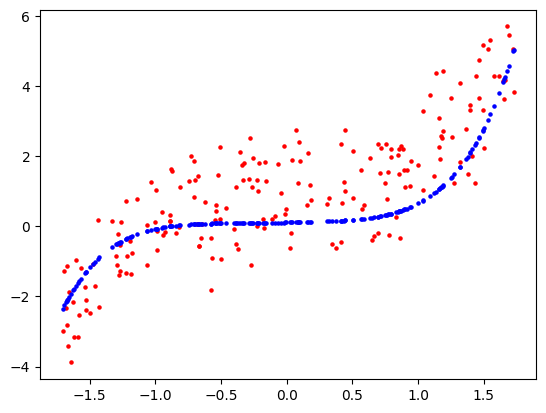

In [36]:
plt.scatter(test['X'], test['Y'], s=5, c='red')
plt.scatter(test['X'], y_pred, s=5, c='blue')